In [298]:
import nipype
import sys, glob
import nibabel as nib
import numpy as np
from nilearn import plotting
import scipy.io

In [364]:
mask1 = nib.load('./results/sub01/mask/mask1.nii')
mask1 = mask1.get_fdata()
masking1 = mask1==1
np.count_nonzero(mask1)

17690

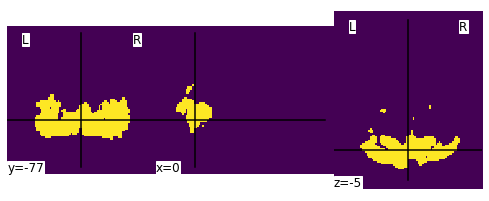

In [218]:
plotting.plot_img('./results/sub01/mask/mask1.nii')

In [360]:
voxel_arr = np.zeros((1100, 17690))
path = './results/sub01/fsf/'
for i in range(10):
    for j in range(110):
        idx = (i*110)+j
        tstat=nib.load('%s/phase1_trialWiseGLM_train_run%i.feat/stats/tstat%i_mask1.nii.gz'%(path, i+1, j+1))
        tstat=tstat.get_fdata()
        tstat_masked = tstat[masking1]
        voxel_arr[idx]= tstat_masked
        if idx%100==0:print(idx)

0
100
200
300
400
500
600
700
800
900
1000


In [359]:
voxel_arr

array([ 1.18045807,  1.55129242,  1.2867955 , ...,  0.09044766,
       -1.08840072,  1.26921308])

In [295]:
img_list=[]

for i in range(1,11):
    mat = scipy.io.loadmat('./exp_info/sub20/stims/data_phase1_run%i.mat'%i)
    imgidxs=mat['designMat'][3]
    imggender=mat['designMat'][2]
    index = mat['designMat'][4]
    for idx in range(len(imgidxs)):
        if index[idx] ==0 and imgidxs[idx] !=0:
            img_list.append([int(imgidxs[idx]), int(imggender[idx])])
img_arr=np.array(img_list)

In [297]:
img_arr.shape

(1100, 2)

In [299]:
f_lat = np.load('./scripts/f_latent.npy', allow_pickle=True)
m_lat = np.load('./scripts/m_latent.npy', allow_pickle=True)

In [349]:
lat_list=[]
for idx, gender in img_arr:
    if gender==1: lat_map=f_lat 
    else: lat_map=m_lat
    lat = lat_map[:,1][idx][0]
    lat_list.append(lat)
lat_arr = np.array(lat_list)

In [350]:
lat_arr.shape

(1100, 100)

In [365]:
voxel_arr.shape, lat_arr.shape

((1100, 17690), (1100, 100))